### Risk Management and Portfolio optimization

##### Algunos conceptos que vamos a ver en esta notebook son:

* Análisis de retornos y de volumen. Algunas conclusiones.
* Distribución de los retornos. Percentiles y quantiles. ¿Qué cosas ver?
* Varianza, desvío estandar (volatilidad) - Indicadores financieros (oscilador de volatilida y radio de volatilidad)
* Correlación, covarianza.
* Introducción a la optimización de portafolios. Ratio de sharpe (media anualizada / volatilidad anualizada)
* Cálculo de medidas de riesgo

In [25]:
# Importamos las librerías que vamos a estar utilizando
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px

In [2]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

In [3]:
# Lo primero que hacemos es descargar la información de las acciones que vamos a analizar
assets = ['SPY','XLK','XLF','XLE']
data = yf.download(assets, end = '2024-02-13', auto_adjust=True)
data

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************

Price            Close                                          High  \
Ticker             SPY        XLE        XLF         XLK         SPY   
Date                                                                   
1993-01-29   24.840677        NaN        NaN         NaN   24.858345   
1993-02-01   25.017359        NaN        NaN         NaN   25.017359   
1993-02-02   25.070354        NaN        NaN         NaN   25.088022   
1993-02-03   25.335371        NaN        NaN         NaN   25.353039   
1993-02-04   25.441378        NaN        NaN         NaN   25.494381   
...                ...        ...        ...         ...         ...   
2024-02-06  493.980011  83.580002  38.830002  201.770004  494.320007   
2024-02-07  498.100006  83.750000  39.119999  204.440002  498.529999   
2024-02-08  498.320007  84.610001  38.970001  205.080002  498.709991   
2024-02-09  501.200012  83.309998  39.080002  207.839996  501.649994   
2024-02-12  500.980011  84.230003  39.259998  206.259995  503.500000   

Price                                                Low             \
Ticker            XLE        XLF         XLK         SPY        XLE   
Date                                                                  
1993-01-29        NaN        NaN         NaN   24.734672        NaN   
1993-02-01        NaN        NaN         NaN   24.858350        NaN   
1993-02-02        NaN        NaN         NaN   24.946681        NaN   
1993-02-03        NaN        NaN         NaN   25.088024        NaN   
1993-02-04        NaN        NaN         NaN   25.141028        NaN   
...               ...        ...         ...         ...        ...   
2024-02-06  84.400002  38.889999  203.270004  492.049988  83.230003   
2024-02-07  84.180000  39.169998  204.490005  495.359985  83.070000   
2024-02-08  84.919998  39.090000  205.630005  497.260010  83.680000   
2024-02-09  85.129997  39.099998  208.110001  498.489990  83.220001   
2024-02-12  84.470001  39.430000  208.470001  500.239990  83.599998   

Price                                    Open                        \
Ticker            XLF         XLK         SPY        XLE        XLF   
Date                                                                  
1993-01-29        NaN         NaN   24.858345        NaN        NaN   
1993-02-01        NaN         NaN   24.858350        NaN        NaN   
1993-02-02        NaN         NaN   24.999684        NaN        NaN   
1993-02-03        NaN         NaN   25.105692        NaN        NaN   
1993-02-04        NaN         NaN   25.423710        NaN        NaN   
...               ...         ...         ...        ...        ...   
2024-02-06  38.650002  200.470001  493.519989  83.720001  38.700001   
2024-02-07  38.770000  202.380005  496.290009  83.820000  39.040001   
2024-02-08  38.720001  204.539993  498.100006  83.699997  38.939999   
2024-02-09  38.820000  205.699997  498.839996  84.769997  38.919998   
2024-02-12  38.990002  205.960007  501.170013  83.599998  39.080002   

Price                     Volume                                     
Ticker             XLK       SPY         XLE         XLF        XLK  
Date                                                                 
1993-01-29         NaN   1003200         NaN         NaN        NaN  
1993-02-01         NaN    480500         NaN         NaN        NaN  
1993-02-02         NaN    201300         NaN         NaN        NaN  
1993-02-03         NaN    529400         NaN         NaN        NaN  
1993-02-04         NaN    531500         NaN         NaN        NaN  
...                ...       ...         ...         ...        ...  
2024-02-06  202.919998  55918600  14028100.0  41055700.0  6338600.0  
2024-02-07  203.190002  70556500  13460200.0  39018700.0  5682900.0  
2024-02-08  204.789993  52343600  18100500.0  47331500.0  4974100.0  
2024-02-09  205.940002  63917600  19034700.0  50679700.0  5804500.0  
2024-02-12  207.830002  56387500  12943700.0  39944900.0  5374400.0  

[7815 rows x 20 colu

In [4]:
# Por otro lado, hacemos lo mismo pero con el precio de Bitcoin. Lo hacemos por separado puesto que
# tiene formas de operar distinta.
btc = yf.download('BTC-USD', end = '2024-02-13', auto_adjust=True)
btc

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-02-08,44332.125000,45575.839844,44332.125000,45301.566406,26154524080
2024-02-09,45297.382812,48152.496094,45260.824219,47147.199219,39316770844
2024-02-10,47153.527344,48146.171875,46905.320312,47771.277344,16398681570


##### En este paso vamos a empezar a transformar la data para luego realizar los cálculos deseados

Existen muchas formas en la que podemos hacer esto y va a depender de como queremos mostrar los datos. Con fines didácticamos
vamos a mostrar diversas formas para introducir algunos conceptos generales como:

* Aplicar filtros a dataframes de pandas
* Indices
* Transformaciones similares a windows functions en SQL

Luego vamos a graficar la serie histórica de precios y la serie histórica de precios normalizada

In [5]:
# Acomodamos el dataframe principal de dos formas distintas solo a los fines didácticos de aprender a filtrar
# En este caso decidimos dejar la fecha como un indice
data_dos = data.stack(future_stack=True, level=1).reset_index(level=[1])
data_dos

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
1993-01-29,SPY,24.840677,24.858345,24.734672,24.858345,1003200.0
1993-01-29,XLE,NaN,NaN,NaN,NaN,NaN
1993-01-29,XLF,NaN,NaN,NaN,NaN,NaN
1993-01-29,XLK,NaN,NaN,NaN,NaN,NaN
1993-02-01,SPY,25.017359,25.017359,24.858350,24.858350,480500.0
...,...,...,...,...,...,...
2024-02-09,XLK,207.839996,208.110001,205.699997,205.940002,5804500.0
2024-02-12,SPY,500.980011,503.500000,500.239990,501.170013,56387500.0
2024-02-12,XLE,84.230003,84.470001,83.599998,83.599998,12943700.0


In [6]:
# Si en este caso solo quisieramos quedarnos con os datos del SPY tenemos que filtrar el dataFrame
SPY = data_dos.loc[data_dos['Ticker'] == 'SPY', :]
SPY

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
1993-01-29,SPY,24.840677,24.858345,24.734672,24.858345,1003200.0
1993-02-01,SPY,25.017359,25.017359,24.858350,24.858350,480500.0
1993-02-02,SPY,25.070354,25.088022,24.946681,24.999684,201300.0
1993-02-03,SPY,25.335371,25.353039,25.088024,25.105692,529400.0
1993-02-04,SPY,25.441378,25.494381,25.141028,25.423710,531500.0
...,...,...,...,...,...,...
2024-02-06,SPY,493.980011,494.320007,492.049988,493.519989,55918600.0
2024-02-07,SPY,498.100006,498.529999,495.359985,496.290009,70556500.0
2024-02-08,SPY,498.320007,498.709991,497.260010,498.100006,52343600.0


In [7]:
# Otra forma podría haber sido quedarnos exclusivamente con los precios de cierre ya que es nuestra variable de interes
data_final = data.stack(future_stack=True, level=0).reset_index(level=1)
data_final

Ticker,Price,SPY,XLE,XLF,XLK
Date,,,,,
1993-01-29,Close,2.484068e+01,NaN,NaN,NaN
1993-01-29,High,2.485834e+01,NaN,NaN,NaN
1993-01-29,Low,2.473467e+01,NaN,NaN,NaN
1993-01-29,Open,2.485834e+01,NaN,NaN,NaN
1993-01-29,Volume,1.003200e+06,NaN,NaN,NaN
...,...,...,...,...,...
2024-02-12,Close,5.009800e+02,8.423000e+01,3.926000e+01,2.062600e+02
2024-02-12,High,5.035000e+02,8.447000e+01,3.943000e+01,2.084700e+02
2024-02-12,Low,5.002400e+02,8.360000e+01,3.899000e+01,2.059600e+02


In [8]:
# Ahora solamente filtramos los precios de cierre. Acá podemos decidir si nos queremos resetear el indice o no
data_final = data_final.loc[data_final['Price'] == 'Close', :].drop(columns = ['Price'])
data_final

Ticker,SPY,XLE,XLF,XLK
Date,,,,
1993-01-29,24.840677,NaN,NaN,NaN
1993-02-01,25.017359,NaN,NaN,NaN
1993-02-02,25.070354,NaN,NaN,NaN
1993-02-03,25.335371,NaN,NaN,NaN
1993-02-04,25.441378,NaN,NaN,NaN
...,...,...,...,...
2024-02-06,493.980011,83.580002,38.830002,201.770004
2024-02-07,498.100006,83.750000,39.119999,204.440002
2024-02-08,498.320007,84.610001,38.970001,205.080002


In [9]:
# Ahora vemos cual es el primer valor no nulo que aparece en cada una de las filas
data_final.apply(lambda x: x.first_valid_index())

Ticker
SPY   1993-01-29
XLE   1998-12-22
XLF   1998-12-22
XLK   1998-12-22
dtype: datetime64[ns]

In [10]:
# Ahora que sabemos cual es el primero valor no nulo vamos a filtrar el dataset para quedarmos con todas las fechas desde ese valor
data_final = data_final[data_final.index >= '1998-12-22']
data_final

Ticker,SPY,XLE,XLF,XLK
Date,,,,
1998-12-22,77.076248,12.329734,11.555720,24.189764
1998-12-23,78.692818,12.586432,11.726110,24.767685
1998-12-24,78.353546,12.520190,11.803564,24.673315
1998-12-28,78.153961,12.453947,11.648657,24.744089
1998-12-29,79.391335,12.578154,11.772588,24.814854
...,...,...,...,...
2024-02-06,493.980011,83.580002,38.830002,201.770004
2024-02-07,498.100006,83.750000,39.119999,204.440002
2024-02-08,498.320007,84.610001,38.970001,205.080002


In [11]:
# Ahora si realizamos un describe de la data
data_final.describe()

Ticker,SPY,XLE,XLF,XLK
count,6325.000000,6325.000000,6325.000000,6325.000000
mean,167.253941,40.204181,17.842263,46.886308
std,114.170715,18.865411,7.864771,44.572575
min,51.179268,11.124029,3.809754,8.741035
25%,84.671013,24.256865,12.269775,17.614222
50%,106.482033,43.031006,15.733569,26.933062
75%,229.140137,51.237850,21.793186,56.799034
max,501.200012,91.794426,39.813980,207.839996


In [12]:
# También tomamos información de valores no nulos
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6325 entries, 1998-12-22 to 2024-02-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     6325 non-null   float64
 1   XLE     6325 non-null   float64
 2   XLF     6325 non-null   float64
 3   XLK     6325 non-null   float64
dtypes: float64(4)
memory usage: 247.1 KB


In [13]:
# Visualizamos otra forma validar los nulos
print(data_final['SPY'].isnull().sum())
print(data_final['XLE'].isnull().sum())
print(data_final['XLF'].isnull().sum())
print(data_final['XLK'].isnull().sum())

0
0
0
0


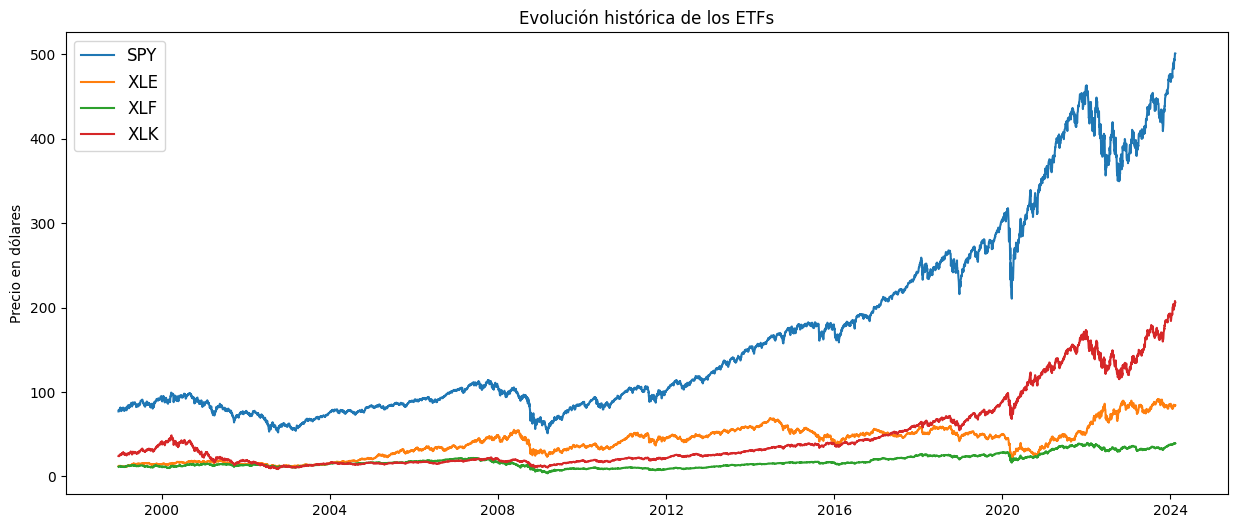

In [14]:
# Ahora lo que hacemos es grafícar el historial de precios
plt.figure(figsize=(15,6))
for i in range(data_final.shape[1]):
    plt.plot(data_final.iloc[:,i], label=data_final.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Precio en dólares')
plt.title('Evolución histórica de los ETFs')
plt.show()

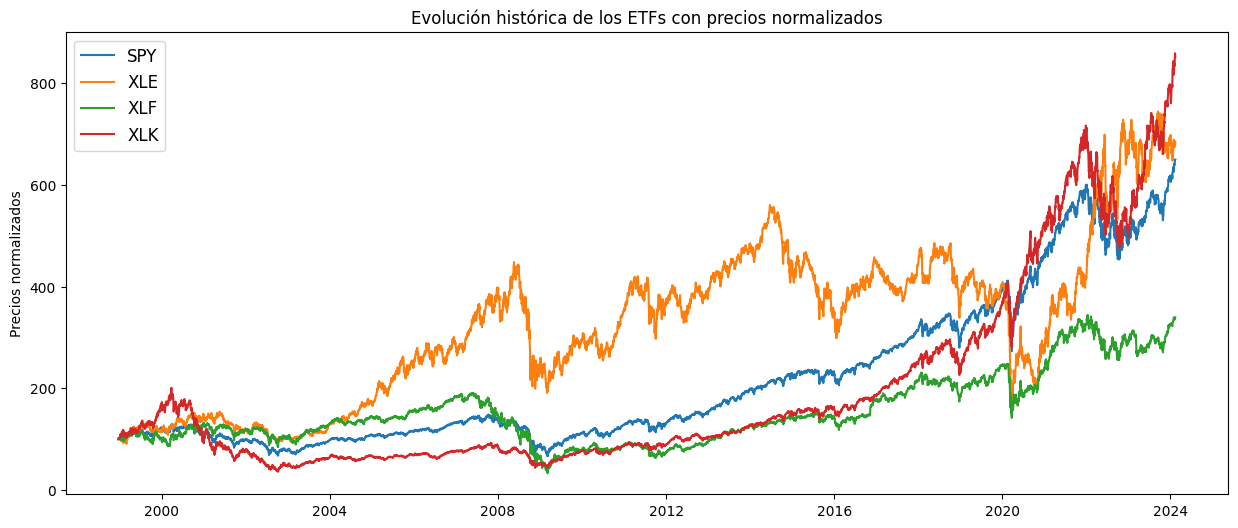

In [15]:
# Lo que sucede es que estas series de precios no estan en escala. Lo que es conveniente hacer en estos casos es:
# 1) Expresar los datos con una base determinada para que esten normalizados en torno a un valor
# 2) calcular los retornos y luego los retornos acumulados.
data_aux = data_final.divide(data_final.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(data_aux.shape[1]):
    plt.plot(data_aux.iloc[:,i], label=data_aux.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Precios normalizados')
plt.title('Evolución histórica de los ETFs con precios normalizados')
plt.show()

##### Calculamos los retornos de cada una de la serie de datos y generamos los gráficos

In [16]:
# Lo primero que tenemos que verificar es que nuestra serie de datos este ordenada temporalmente
# en este caso ya lo sabemos pero en cualquier caso siempre podemos hacerlo ...
data_final = data_final.sort_values(by= 'Date', ascending=True)
data_final

Ticker,SPY,XLE,XLF,XLK
Date,,,,
1998-12-22,77.076248,12.329734,11.555720,24.189764
1998-12-23,78.692818,12.586432,11.726110,24.767685
1998-12-24,78.353546,12.520190,11.803564,24.673315
1998-12-28,78.153961,12.453947,11.648657,24.744089
1998-12-29,79.391335,12.578154,11.772588,24.814854
...,...,...,...,...
2024-02-06,493.980011,83.580002,38.830002,201.770004
2024-02-07,498.100006,83.750000,39.119999,204.440002
2024-02-08,498.320007,84.610001,38.970001,205.080002


In [17]:
# Calculamos los retonos de estas series y luego eliminamos los valores nulos de la primera fila
retornos = data_final / data_final.shift(1) - 1
retornos = retornos.dropna()
retornos

Ticker,SPY,XLE,XLF,XLK
Date,,,,
1998-12-23,0.020974,0.020819,0.014745,0.023891
1998-12-24,-0.004311,-0.005263,0.006605,-0.003810
1998-12-28,-0.002547,-0.005291,-0.013124,0.002868
1998-12-29,0.015833,0.009973,0.010639,0.002860
1998-12-30,-0.008044,-0.015142,-0.003948,-0.003802
...,...,...,...,...
2024-02-06,0.002903,0.003241,0.002065,-0.004588
2024-02-07,0.008340,0.002034,0.007468,0.013233
2024-02-08,0.000442,0.010269,-0.003834,0.003130


In [18]:
# Otra forma de poder haber calculado los retornos es a través del método pct_change() de pandas
retornos = data_final.pct_change()
retornos = retornos.dropna()
retornos

Ticker,SPY,XLE,XLF,XLK
Date,,,,
1998-12-23,0.020974,0.020819,0.014745,0.023891
1998-12-24,-0.004311,-0.005263,0.006605,-0.003810
1998-12-28,-0.002547,-0.005291,-0.013124,0.002868
1998-12-29,0.015833,0.009973,0.010639,0.002860
1998-12-30,-0.008044,-0.015142,-0.003948,-0.003802
...,...,...,...,...
2024-02-06,0.002903,0.003241,0.002065,-0.004588
2024-02-07,0.008340,0.002034,0.007468,0.013233
2024-02-08,0.000442,0.010269,-0.003834,0.003130


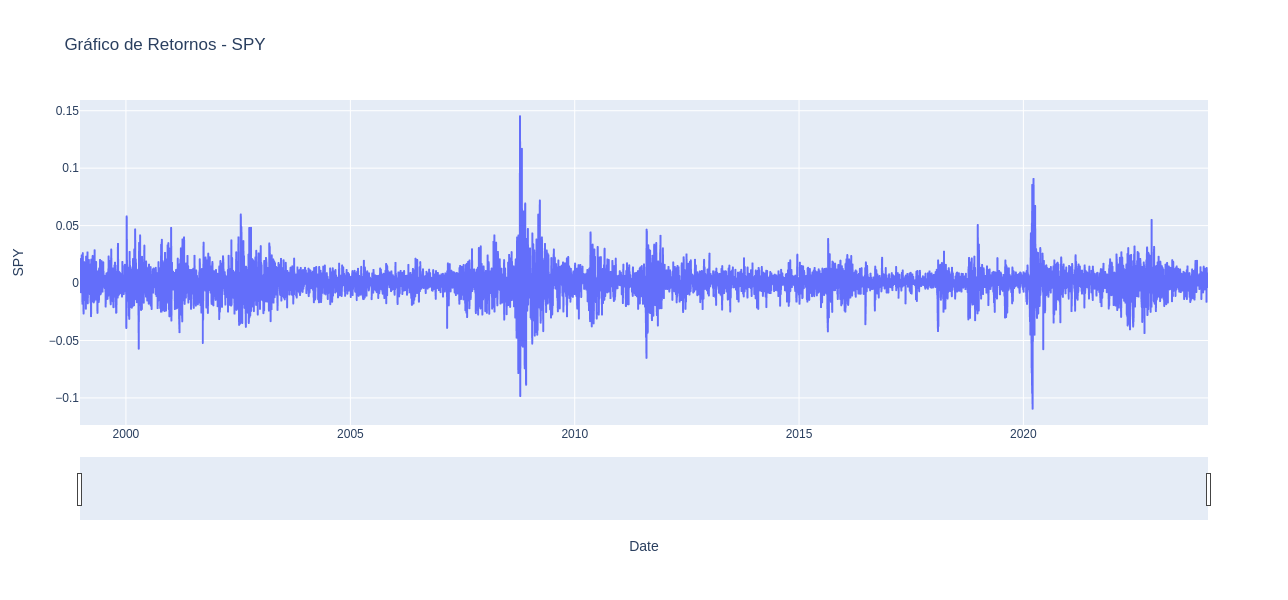

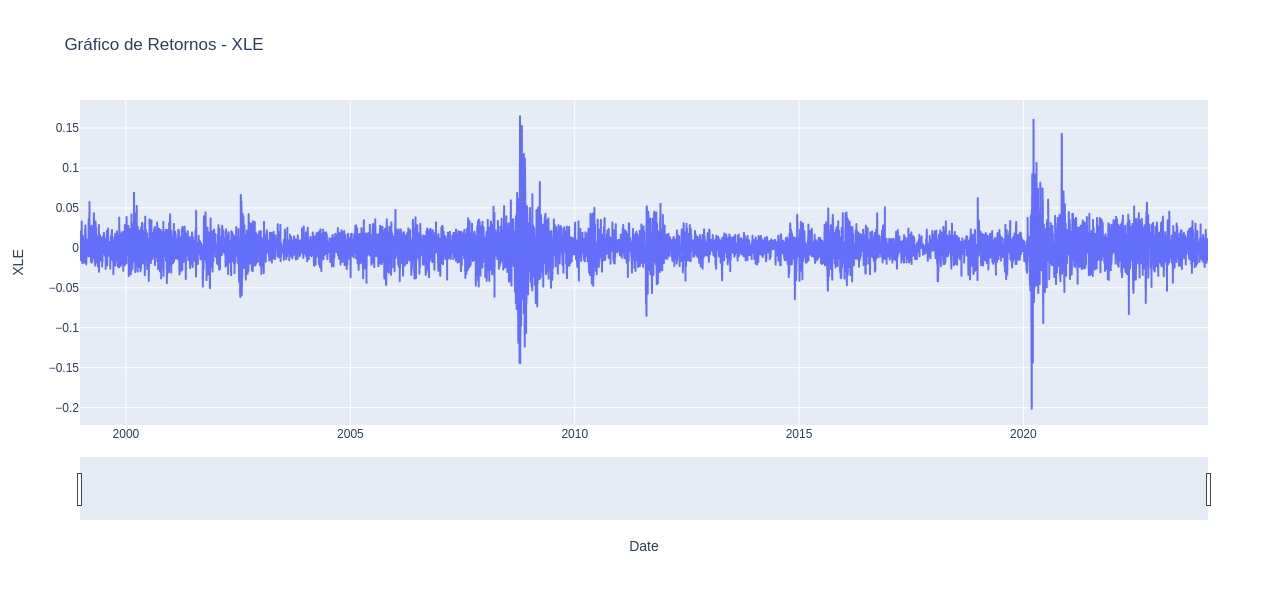

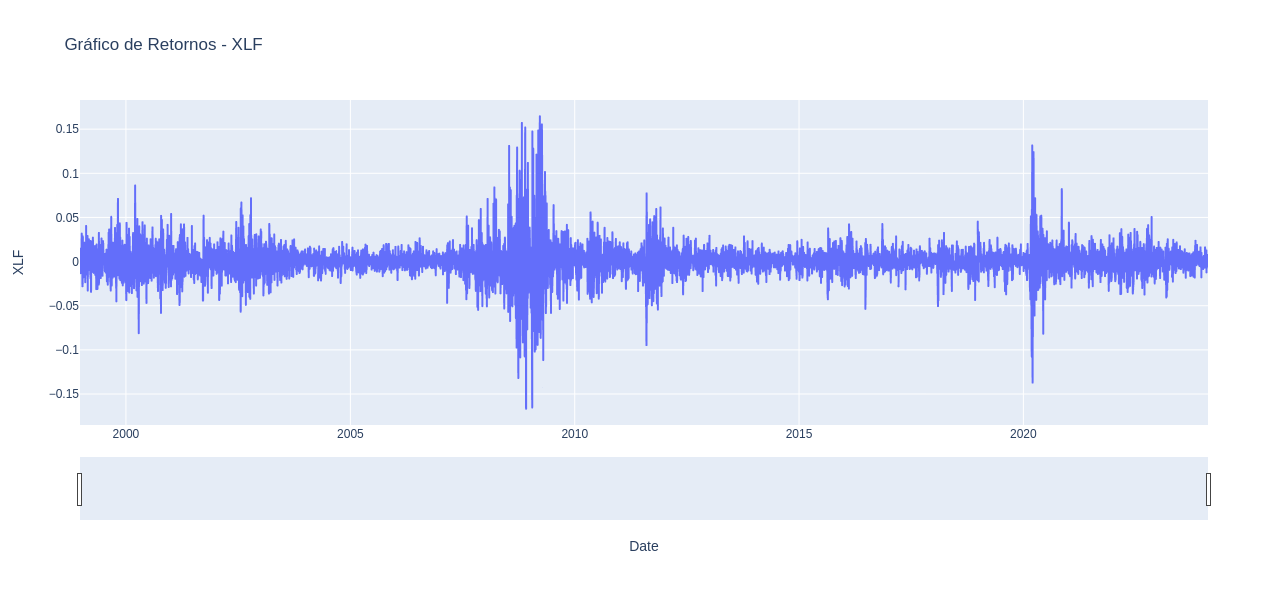

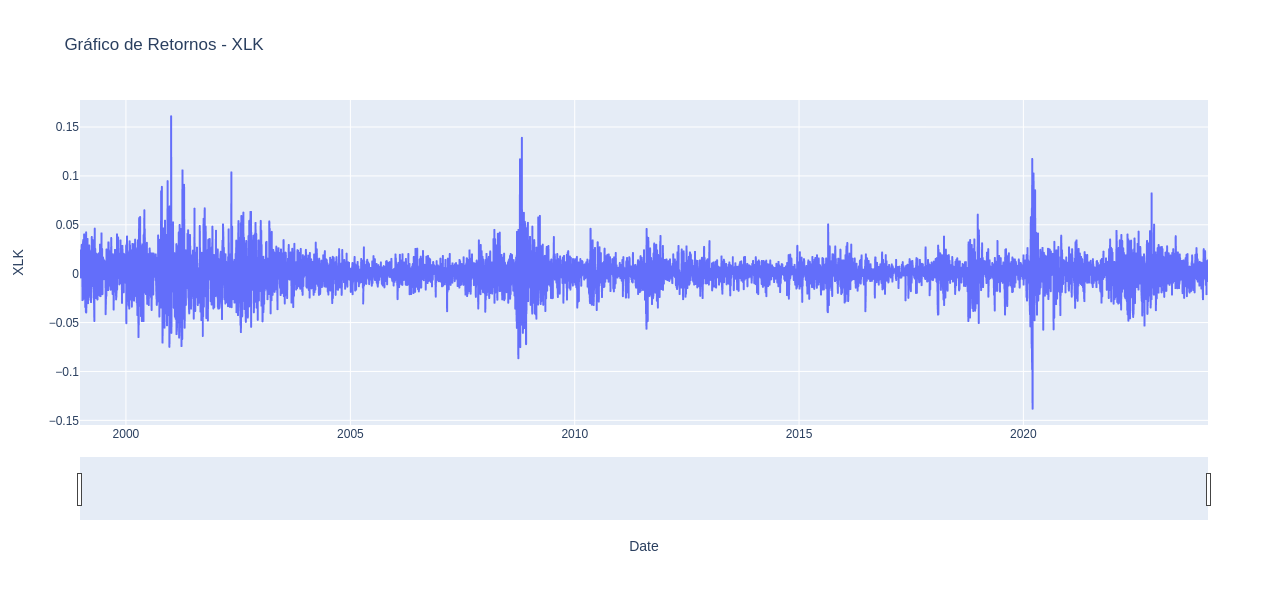

In [57]:
# Hacemos el gráfico de los retornos con plotly para que sea interactivo. En notebooks anteriores tenemos lo mismo con matplotlib
for i in retornos.columns:
    fig = px.line(retornos, x=retornos.index, y=i, title=f'Gráfico de Retornos - {i}')
    fig.update_layout(
        width=1300,
        height=600,
        xaxis_rangeslider_visible=True,
    )
    fig.show()

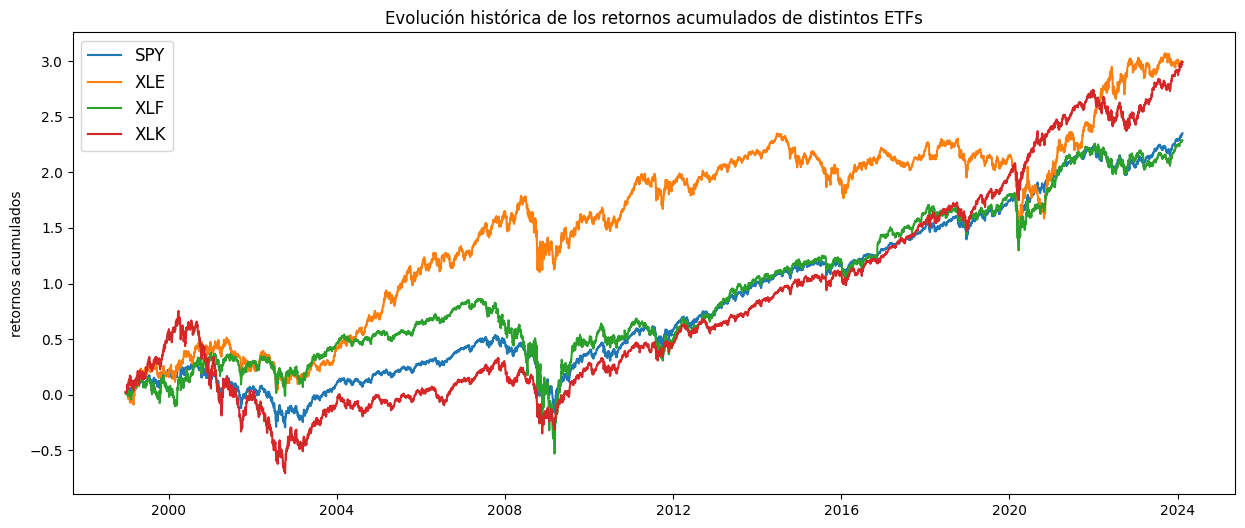

In [59]:
# Una vez que tenemos estos gráficos hacemos lo mismo pero con retornos acumulativos.
# Hay que tener en cuenta que este gráfico tiene en cuenta la reinversión de los retornos de manera diaria.
retornos_aux = retornos.cumsum()

plt.figure(figsize=(15, 6))
for i in range(retornos_aux.shape[1]):
    plt.plot(retornos_aux.iloc[:,i], label=retornos_aux.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('retornos acumulados')
plt.title('Evolución histórica de los retornos acumulados de distintos ETFs')
plt.show()

##### Analizamos como se comporta la distribución del SPY para ver si se parece a una normal